In [123]:
import pandas as pd
data=pd.read_csv("C:/Users/dheve/OneDrive/Desktop/ML-project/ml-app-salaryprediction-main/survey_results_public.csv")


In [124]:
data.head(4)

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4


In [125]:
data=data[['Country','EdLevel','YearsCodePro','Employment','ConvertedComp']]
data=data.rename({'ConvertedComp':'salary'},axis=1)
data.head(4)

,Country,EdLevel,YearsCodePro,Employment,salary
0,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",27,"Independent contractor, freelancer, or self-em...",NaN
1,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,Employed full-time,NaN
2,Russian Federation,NaN,NaN,NaN,NaN
3,Albania,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,NaN,NaN


In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       64072 non-null  object 
 1   EdLevel       57431 non-null  object 
 2   YearsCodePro  46349 non-null  object 
 3   Employment    63854 non-null  object 
 4   salary        34756 non-null  float64
dtypes: float64(1), object(4)
memory usage: 2.5+ MB


In [127]:
data.isnull().sum()

Country           389
EdLevel          7030
YearsCodePro    18112
Employment        607
salary          29705
dtype: int64

In [128]:
data.dropna()
data.head(4)

,Country,EdLevel,YearsCodePro,Employment,salary
0,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",27,"Independent contractor, freelancer, or self-em...",NaN
1,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,Employed full-time,NaN
2,Russian Federation,NaN,NaN,NaN,NaN
3,Albania,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,NaN,NaN


In [129]:
data.isnull().sum()

Country           389
EdLevel          7030
YearsCodePro    18112
Employment        607
salary          29705
dtype: int64

In [130]:
data.duplicated().sum()

28074

In [131]:
data['Country'].value_counts()

Country
United States       12469
India                8403
United Kingdom       3896
Germany              3890
Canada               2191
                    ...  
Kiribati                1
Nauru                   1
Lesotho                 1
Saint Lucia             1
Marshall Islands        1
Name: count, Length: 183, dtype: int64

In [132]:
data

,Country,EdLevel,YearsCodePro,Employment,salary
0,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",27,"Independent contractor, freelancer, or self-em...",NaN
1,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,Employed full-time,NaN
2,Russian Federation,NaN,NaN,NaN,NaN
3,Albania,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,NaN,NaN
4,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,Employed full-time,NaN
...,...,...,...,...,...
64456,United States,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Less than 1 year,Employed full-time,NaN
64457,Morocco,NaN,NaN,Employed full-time,NaN
64458,Viet Nam,Primary/elementary school,NaN,NaN,NaN
64459,Poland,NaN,NaN,Employed full-time,NaN


In [133]:
data=data[data['Employment']=='Employed full-time']

In [134]:
data.drop('Employment',axis=True)

,Country,EdLevel,YearsCodePro,salary
1,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,NaN
4,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,NaN
5,Germany,"Secondary school (e.g. American high school, G...",4,NaN
6,India,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,NaN
7,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",13,116000.0
...,...,...,...,...
64452,India,NaN,NaN,NaN
64456,United States,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Less than 1 year,NaN
64457,Morocco,NaN,NaN,NaN
64459,Poland,NaN,NaN,NaN


In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45270 entries, 1 to 64460
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       45177 non-null  object 
 1   EdLevel       41011 non-null  object 
 2   YearsCodePro  39954 non-null  object 
 3   Employment    45270 non-null  object 
 4   salary        30608 non-null  float64
dtypes: float64(1), object(4)
memory usage: 2.1+ MB


In [136]:
data['Country'].value_counts()

Country
United States      9765
India              6085
United Kingdom     2993
Germany            2720
Canada             1576
                   ... 
Djibouti              1
Saint Lucia           1
Bahamas               1
Tajikistan            1
Solomon Islands       1
Name: count, Length: 176, dtype: int64

In [137]:
def shorten_categories(categories, cutoff):
    # Create a dictionary to map categories
    categorical_map = {}
    
    # Iterate through categories
    for i in range(len(categories)):
        if categories.values[i] < cutoff:
            categorical_map[categories.index[i]] = "other"
        else:
            categorical_map[categories.index[i]] = categories.index[i]
            
    return categorical_map

In [138]:
# Get the country mapping with a cutoff
country_counts = data['Country'].value_counts()

# Use the function to generate the mapping
country_map = shorten_categories(country_counts, 400)

# Apply the mapping to the Country column
data['Country'] = data['Country'].map(country_map)

# Count the occurrences in the updated Country column
print("Updated Country Counts:")
print(data['Country'].value_counts())

Updated Country Counts:
Country
other                 11350
United States          9765
India                  6085
United Kingdom         2993
Germany                2720
Canada                 1576
Brazil                 1340
France                 1337
Spain                   915
Australia               893
Netherlands             883
Russian Federation      793
Poland                  783
Italy                   768
Sweden                  658
Turkey                  527
Pakistan                483
Israel                  472
Romania                 421
Switzerland             415
Name: count, dtype: int64


C:\Users\dheve\AppData\Local\Temp\ipykernel_29408\87115646.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Country'] = data['Country'].map(country_map)


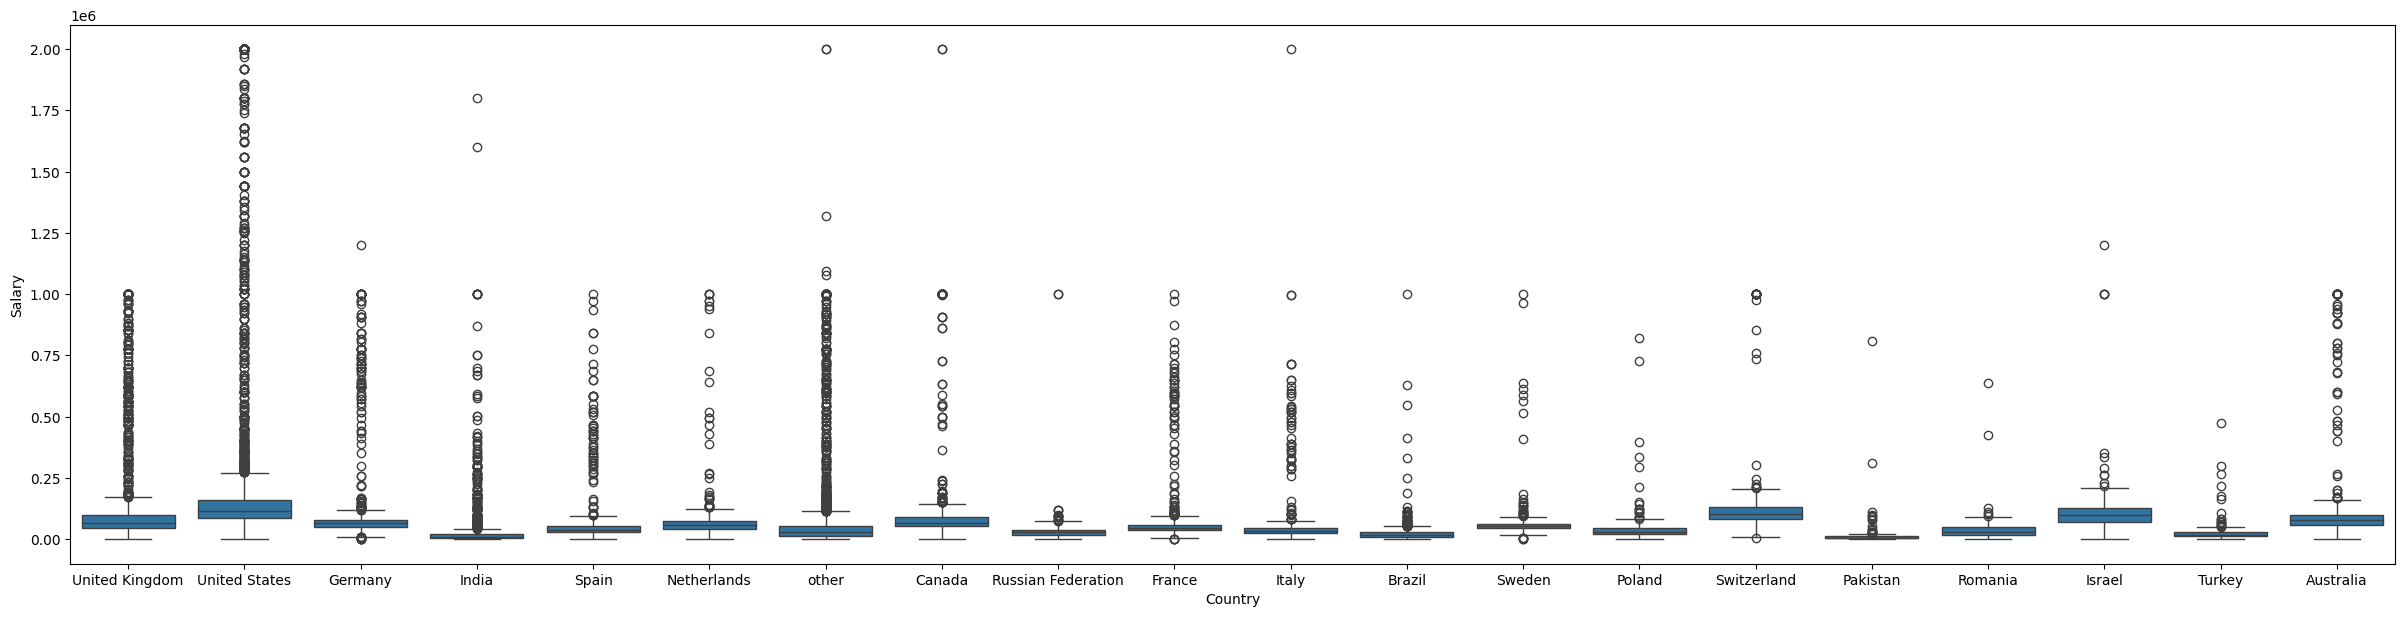

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(30,7))
sns.boxplot(data=data,x='Country',y='salary')
plt.xlabel('Country')
plt.ylabel('Salary')
plt.show()

In [140]:
data=data[data['salary'] <= 250000]
data=data[data['salary'] >= 10000]
data=data[data['Country'] != 'other']


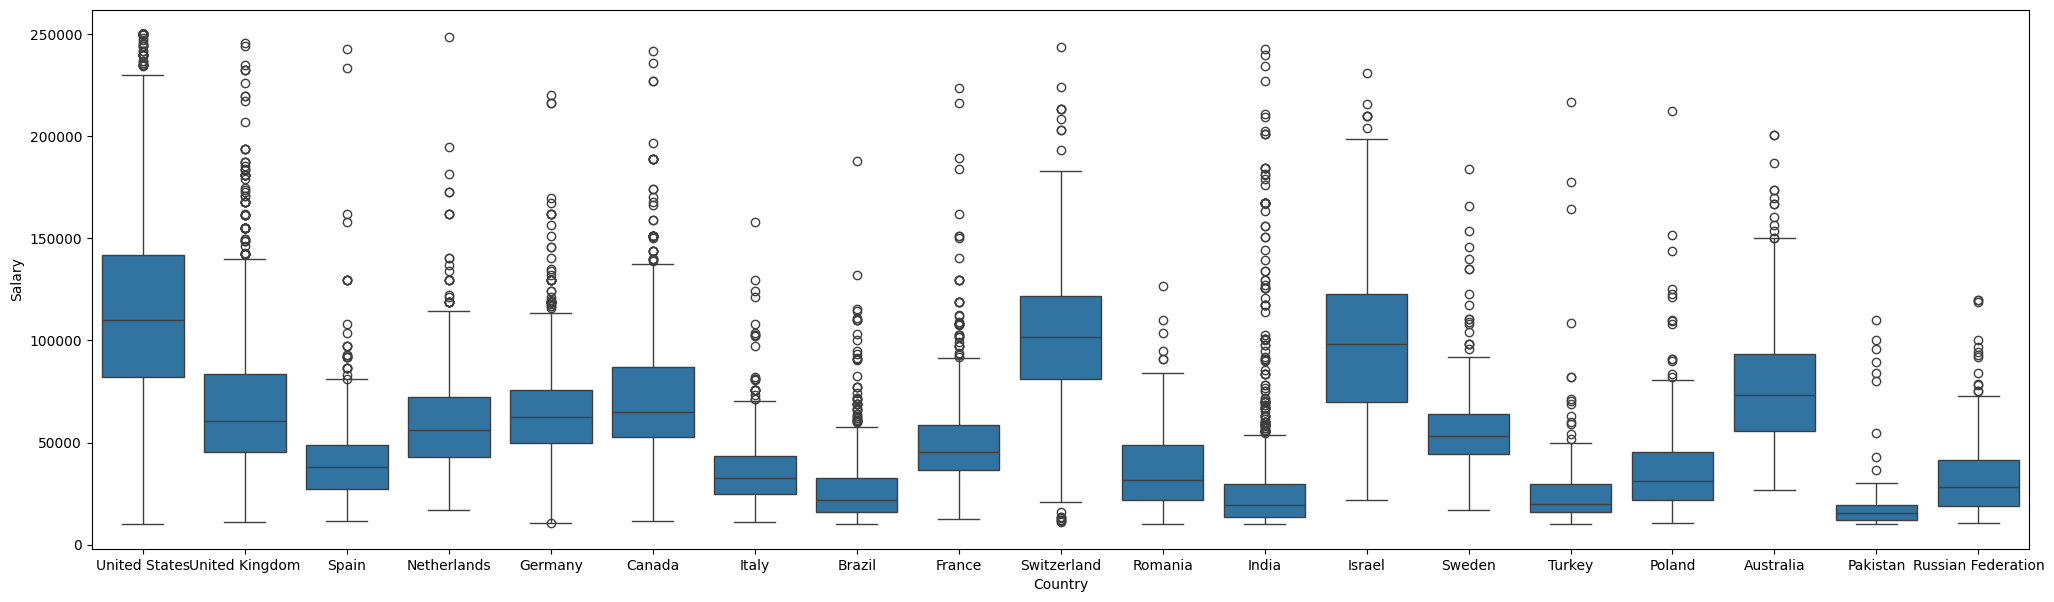

In [141]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(25,7))
sns.boxplot(data=data,x='Country',y='salary')
plt.xlabel('Country')
plt.ylabel('Salary')
plt.show()

In [142]:
data["YearsCodePro"].unique()

array(['13', '4', '2', '7', '20', '1', '3', '10', '12', '29', '6', '28',
       '8', '23', '15', '25', '9', '11', 'Less than 1 year', '5', '21',
       '16', '18', '14', '32', '19', '22', '38', '30', '26', nan, '27',
       '17', '24', '34', '35', '33', '36', '40', '39',
       'More than 50 years', '31', '37', '41', '45', '42', '44', '43',
       '50', '49'], dtype=object)

In [143]:
def clean_experience(x):
    if x == 'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)
data["YearsCodePro"] = data["YearsCodePro"].apply(clean_experience)#when we use apply the pandas itrate over each data send that as argument to function


In [144]:
data["YearsCodePro"].unique()

array([13. ,  4. ,  2. ,  7. , 20. ,  1. ,  3. , 10. , 12. , 29. ,  6. ,
       28. ,  8. , 23. , 15. , 25. ,  9. , 11. ,  0.5,  5. , 21. , 16. ,
       18. , 14. , 32. , 19. , 22. , 38. , 30. , 26. ,  nan, 27. , 17. ,
       24. , 34. , 35. , 33. , 36. , 40. , 39. , 50. , 31. , 37. , 41. ,
       45. , 42. , 44. , 43. , 49. ])

In [145]:
data['EdLevel'].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)', nan,
       'I never completed any formal education',
       'Primary/elementary school'], dtype=object)

In [146]:
def clean_education(x):
    if isinstance(x, str):
        if 'Bachelor’s degree' in x:
            return 'Bachelor’s degree'
        if 'Master’s degree' in x:
            return 'Master’s degree'
        if 'Professional degree' in x or 'Other doctoral' in x:
            return 'Post grad'
    return "less than a Bachelors"
data['EdLevel'] = data['EdLevel'].apply(clean_education)
print(data)

              Country                EdLevel  YearsCodePro  \
7       United States      Bachelor’s degree          13.0   
9      United Kingdom        Master’s degree           4.0   
10     United Kingdom      Bachelor’s degree           2.0   
11              Spain  less than a Bachelors           7.0   
12        Netherlands  less than a Bachelors          20.0   
...               ...                    ...           ...   
64116   United States      Bachelor’s degree           6.0   
64122   United States  less than a Bachelors           4.0   
64123  United Kingdom        Master’s degree           NaN   
64127   United States              Post grad          12.0   
64129   United States        Master’s degree           4.0   

               Employment    salary  
7      Employed full-time  116000.0  
9      Employed full-time   32315.0  
10     Employed full-time   40070.0  
11     Employed full-time   14268.0  
12     Employed full-time   38916.0  
...                   ...  

In [147]:
data['EdLevel'].unique()

array(['Bachelor’s degree', 'Master’s degree', 'less than a Bachelors',
       'Post grad'], dtype=object)

## since the model doesnot understand the string we convert it into float

In [148]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
le_education = LabelEncoder()
data['EdLevel'] = le_education.fit_transform(data['EdLevel'])
print("Encoded EdLevel unique values:", data['EdLevel'].unique())

Encoded EdLevel unique values: [0 1 3 2]


In [149]:
le_country = LabelEncoder()
data['Country'] = le_education.fit_transform(data['Country'])
print("Encoded EdLevel unique values:", data['Country'].unique())


Encoded EdLevel unique values: [18 17 13  8  4  2  7  1  3 15 11  5  6 14 16 10  0  9 12]


In [150]:
data=data.dropna()
data=data.drop('Employment',axis=1)
x=data.drop('salary',axis=True)
y=data['salary']

In [151]:
from sklearn.linear_model import LinearRegression
linear_ref=LinearRegression()
linear_ref.fit(x,y.values)

LinearRegression()

In [152]:
y_pred=linear_ref.predict(x)

In [153]:
from sklearn.metrics import mean_squared_error,accuracy_score
import numpy as np
np.sqrt(mean_squared_error(y_pred,y))

39548.28987829597

In [154]:
from sklearn.tree import DecisionTreeRegressor
dec_tree = DecisionTreeRegressor(random_state=42)  
dec_tree.fit(x, y.values)  


DecisionTreeRegressor(random_state=42)

In [155]:
y_pre=dec_tree.predict(x)


In [156]:
from sklearn.metrics import mean_squared_error,accuracy_score
import numpy as np
np.sqrt(mean_squared_error(y_pre,y))

28951.951288640663

In [157]:
from sklearn.ensemble import RandomForestRegressor
random_tree = RandomForestRegressor(random_state=42)  
random_tree.fit(x, y.values)  


RandomForestRegressor(random_state=42)

In [158]:
y_pr=random_tree.predict(x)

In [159]:
from sklearn.metrics import mean_squared_error,accuracy_score
import numpy as np
np.sqrt(mean_squared_error(y_pr,y))

29043.059098916063

In [160]:
## finding best model in decsion tree

In [161]:
#scikit-learn.org/stable/modules/model_evalution.html
from sklearn.model_selection import GridSearchCV #test the parameter with different model
max_depth = [None, 2, 4, 6, 8, 10, 12]
parameters = {"max_depth": max_depth} 
regressor = DecisionTreeRegressor(random_state=42)
gs = GridSearchCV(estimator=regressor, param_grid=parameters, scoring='neg_mean_squared_error', cv=5)#cv(cross_velidation) mean the process done 5 times where 80% will be train data and remaing will be for validation each time their is different validattion from the train dataset 
#neg_mean_squared_error convert negative into positive 
gs.fit(x,y.values)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [162]:
regressor=gs.best_estimator_#create a seprate validation from train dataset
regressor.fit(x,y.values)
y_pred=regressor.predict(x)
error=np.sqrt(mean_squared_error(y,y_pred))
print("${:,.02f}".format(error))

$30,406.23


In [163]:
x

,Country,EdLevel,YearsCodePro
7,18,0,13.0
9,17,1,4.0
10,17,0,2.0
11,13,3,7.0
12,8,3,20.0
...,...,...,...
64113,18,3,15.0
64116,18,0,6.0
64122,18,3,4.0
64127,18,2,12.0


In [165]:
x=np.array([['United State','Master’s degree ','15']])
x

array([['United State', 'Master’s degree ', '15']], dtype='<U16')

In [166]:
#Fitting: When you call fit on an encoder (like LabelEncoder), you are teaching it how to convert the categorical values into numerical labels.
#The encoder learns the unique categories present in the data.
le_country.fit(x[:, 0])  
le_education.fit(x[:, 1]) 
x[:, 0] = le_country.transform(x[:, 0])
#This line transforms the first column of x using the label encoder fitted earlier. Each unique value in the country column is replaced with its corresponding integer label.   
x[:, 1] = le_education.transform(x[:, 1])
x = x.astype(float)
#After transforming the categorical features into numerical labels, this line converts the entire array x,to a floating-point type
print(x)

[[ 0.  0. 15.]]


In [167]:
y_pred=regressor.predict(x)
y_pred

C:\Users\dheve\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([91511.76])

In [168]:
import pickle

In [169]:
import pickle

# Example dictionary to save
data = {
    'model': regressor,           # Ensure the model is included
    'le_country': le_country,
    'le_education': le_education
}

# Save to file
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)


In [170]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)
    print(data)  # Inspect the keys and data in the dictionary





{'model': DecisionTreeRegressor(max_depth=8, random_state=42), 'le_country': LabelEncoder(), 'le_education': LabelEncoder()}


In [171]:
y_pred=regressor.predict(x)
y_pred

C:\Users\dheve\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([91511.76])